O objetivo deste notebook é demonstrar como testes de hipótese podem ser utilizados junto de outras análises para garantir maior precisão estatística em nossas análises e afirmações.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tmbd = pd.read_csv('./data/tmbd/tmdb_5000_movies.csv')
tmbd.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Pegando os filmes apenas com 10 votos ou mais

In [4]:
tmbd = tmbd[tmbd['vote_count']>=10]

In [5]:
sns.set_theme()

### Observando as distribuições de vote average

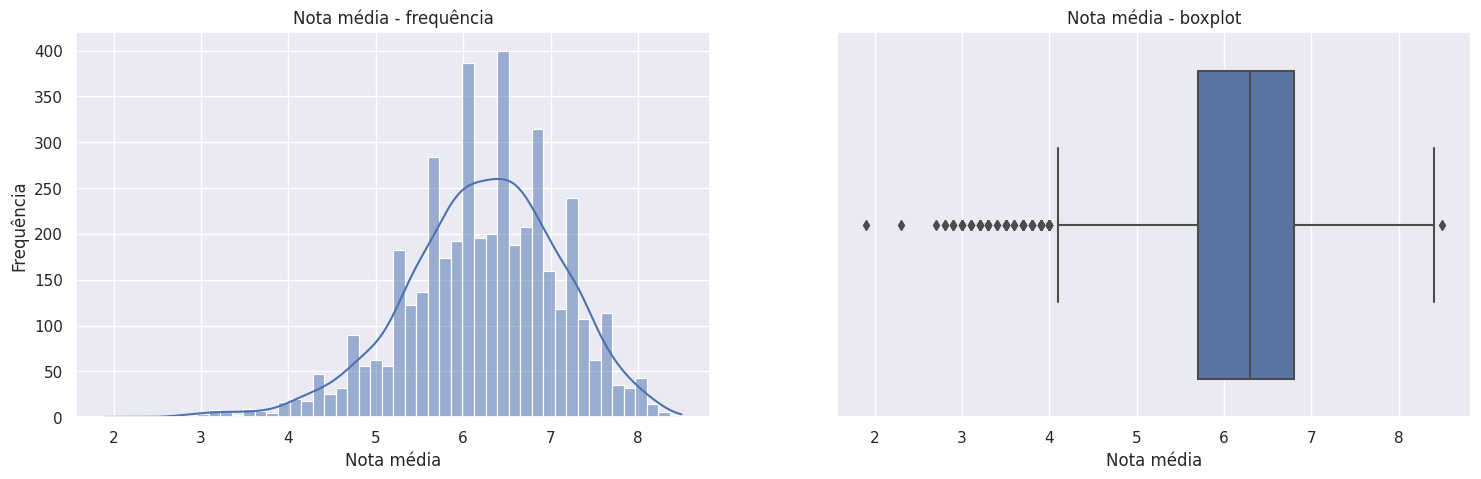

In [6]:
fig, axs = plt.subplots(1, 2,figsize=(18, 5))

sns.histplot(tmbd.vote_average, ax=axs[0], kde=True)

axs[0].set_title('Nota média - frequência')
axs[0].set(xlabel='Nota média', ylabel='Frequência')


sns.boxplot(x = tmbd.vote_average, ax=axs[1])
axs[1].set_title('Nota média - boxplot')
axs[1].set(xlabel='Nota média')


plt.show()


As distribuição de vote average se aproxima de uma distribuição normal. Vemos pelo boxplot que pelo menos 75% dos filmes tem uma nota média abaixo de 7.

### Vamos verificar as notas dos filmes do movielens

In [7]:
notas = pd.read_csv('./data/movielens/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# pegando a média das notas e a quantidade de votos
notas_media = notas.groupby('movieId').agg({'rating':'mean','movieId':'count'}).reset_index(names=['movie'])
notas_media.rename(columns={'movieId':'qtde.votos'},inplace=True)
notas_media = notas_media[notas_media['qtde.votos']>=10]
notas_media

,movie,rating,qtde.votos
0,1,3.920930,215
1,2,3.431818,110
2,3,3.259615,52
4,5,3.071429,49
5,6,3.946078,102
...,...,...,...
9553,174055,3.423077,13
9586,176371,3.805556,18
9603,177765,3.538462,13
9627,179819,3.125000,12


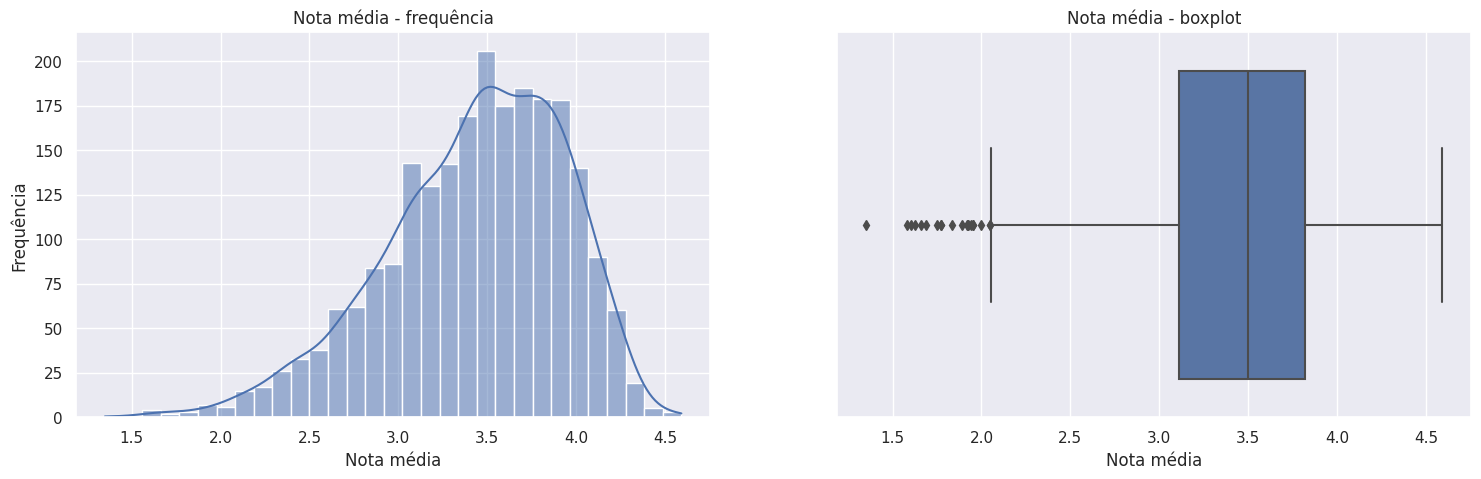

In [9]:
fig, axs = plt.subplots(1, 2,figsize=(18, 5))

sns.histplot(notas_media.rating, ax=axs[0], kde=True)

axs[0].set_title('Nota média - frequência')
axs[0].set(xlabel='Nota média', ylabel='Frequência')


sns.boxplot(x = notas_media.rating, ax=axs[1])
axs[1].set_title('Nota média - boxplot')
axs[1].set(xlabel='Nota média')


plt.show()

Apesar no intervalo de notas ser menor, vemos que as distribuição de vote average para o movielens é bem parecida com a distribuição do tmbd.

### Verificando a média dos filmes

In [10]:
notas_media['rating'].mean()

3.4320503405352594

De acordo com os dados do MovieLens nós temos uma média de nota de 3.43. O que queremos saber é: com base nestes nossos dados, qual a média de notas da população geral? Iremos verificar se este valor de 3.43 representa a população geral, ou apenas representa a média dentro do nosso conjunto de dados.

In [11]:
notas_media.shape

(2269, 3)

Como temos uma amostra grande, com mais de 2000 votos, vamos utilizar um teste Z. 

In [12]:
from statsmodels.stats.weightstats import zconfint

O zconfint irá retornar o intervalo de confiança baseado em um teste z. 

In [13]:
zconfint(x1=notas_media.rating,alpha=0.05)

(3.4112459477469557, 3.452854733323563)

Então dado este intervalo de confiança podemos dizer que a média dos filmes na população geral pode estar entre 3.41 e 3.45

### Analisando um único filme

In [14]:
movies = pd.read_csv('./data/movielens/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
movie1 = movies.query('movieId==1')
movie1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [16]:
notas1 = notas.query('movieId==1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


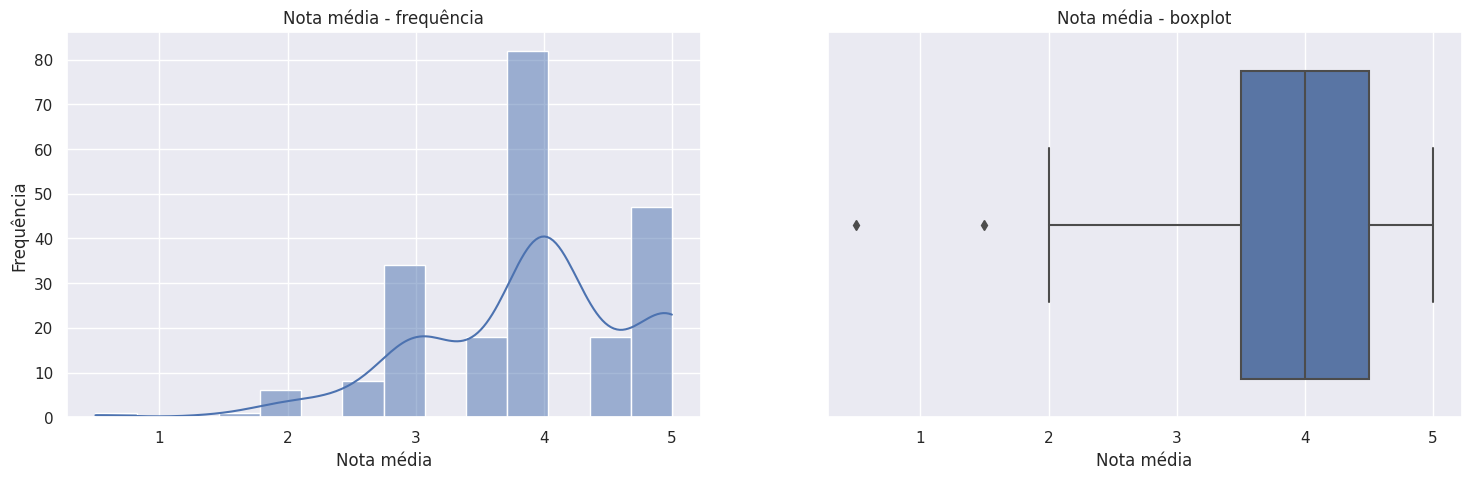

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(18, 5))

sns.histplot(notas1.rating, ax=axs[0], kde=True)

axs[0].set_title('Nota média - frequência')
axs[0].set(xlabel='Nota média', ylabel='Frequência')


sns.boxplot(x = notas1.rating, ax=axs[1])
axs[1].set_title('Nota média - boxplot')
axs[1].set(xlabel='Nota média')


plt.show()

Vemos que a mediana está em 4, mas quando analisamos o conjunto de dados de maneira geral a mediana dos filmes deu 3.5.

Além disso, no código abaixo vemos que a média de notas do Toy Story é de 3.92, que também é maior que a média de 3.43 para o conjunto de dados total.

In [18]:
notas1['rating'].mean()

3.9209302325581397

Então podemos nos perguntar: O filme Toy Story (id 1 ) tem realmente uma média acima do observado nos filmes do conjunto de dados geral? O quanto, estatisticamente falando, essa diferença é significativa?

Vamos observar graficamente

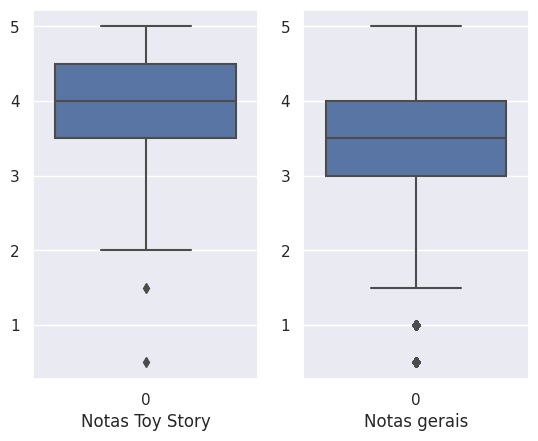

In [29]:
fig ,axs = plt.subplots(1,2)

sns.boxplot(notas1.rating,ax=axs[0])
axs[0].set(xlabel='Notas Toy Story')
sns.boxplot(notas.rating, ax=axs[1])
axs[1].set(xlabel='Notas gerais')

plt.show()

Visualmente falando também vemos esta diferença entre a média de Toy Story e a média geral. Porém, o quão signigicativa é esta diferença? E se ela for uma diferença por mero acaso?

In [19]:
notas1.shape

(215, 4)

In [31]:
notas.shape

(100836, 4)

Como temos mais de 200 amostras, podemos aplicar novamente o teste Z.

Qual a possível média de Toy Story?

In [20]:
zconfint(x1=notas1.rating,alpha=0.05)

(3.8093359183563402, 4.032524546759939)

Qual a possível média de notas na população?

In [30]:
zconfint(x1=notas.rating,alpha=0.05)

(3.4951222802618678, 3.507991686972056)

Então podemos dizer que a média do Filme Toy Story na população real pode estar entre 3.80 e 4.03. E este valor é maior do que o intervalo obtido quando olhamos para a possível média dos filmes em geral, que foi de 3.49 a 3.50.

Então dada essa diferença, parece que realmente o filme Toy Story tem uma média acima das demais.

Vamos seguir com os testes e realizar um z-test para saber se a média do filme Toy Story é maior que a média geral de 3.43 em nossos dados. Nesse teste, teremos as seguintes hipóteses:


- Ho = a média da população não é maior que a média dada
- Ha = a média da população é maior que a média dada

In [21]:
from statsmodels.stats.weightstats import ztest

In [22]:
stat, p = ztest(x1=notas1.rating,value=3.4320503405352594, alternative='larger')
print('p-value:',p)

p-value: 4.489095200942824e-18


Dado o p-value < alpha, rejeitamos a Ho de que a média do filme Toy Story não é maior que 3.43 (média dada)

Podemos seguir e verificarmos um intervalo de confiança comparando agora as duas amostras, as notas do filme de Toy Story com as notas gerais e verificar a diferença estatística entre elas.

In [23]:
zconfint(notas1.rating,notas.rating)

(0.2799245129192442, 0.5588219849631111)

In [24]:
stat , p  = ztest(x1=notas1.rating,x2=notas.rating, alternative='two-sided')
p

3.762112778881965e-09

Então podemos interpretar que a média de Toy Story (notas1.rating) está entre 0.27 e 0.55 mais alta que a média dos filmes em geral (notas.rating) com um p-value de ${3.762112778881965e-09}$ (bem menor do que 0.05). Então sim, podemos acreditar que de fato o filme Toy Story é um filme acima da média.

#### Então o que fizemos foi:

- Observamos o boxplot (visualmente vimos a diferença das médias)
- Obtivemos um intervalo de confiança para verificar a possível média real de Toy Story na população (chegando a valores entre 3.80 e 4.03), valor este que batia com a média dos nossos dados, que foi de 3.92 para o Toy Story
- Realizamos mais um ztest para verificar se a média de Toy Story era maior que 3.43 (média geral nos nossos dados), obtendo um p-value < alpha, assim rejeitando a Ho de que a média de Toy Story não é maior que 3.43
- Obtivemos um intervalo de confiança, mas agora comparando duas amostras (notas Toy Story e notas gerais) chegando a um intervalo de confiança  que dizia que a média de Toy Story estava entre 0.27 e 0.55 mais alta que a média dos filmes em geral

Então passamos por todas essas etapas para poder averiguar que de fato havia uma diferença nas médias e que a média de Toy Story era acima das demais com uma diferença estatisticamente significativa dado os resultados dos testes.


### Comparando filmes